# Perceptron

### Dataset

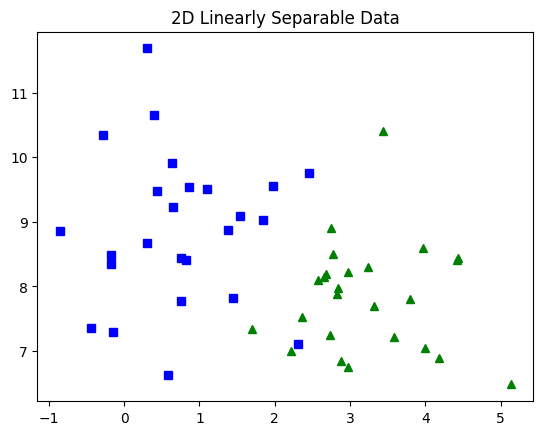

In [6]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
n = 50
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10),)
plt.title('2D Linearly Separable Data')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()
y = y*2-1
y = y.reshape(n,1)
# seperate dataset to 60% train and 40% test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,random_state=42)

### Define Perceptron

In [27]:
class Perceptron(object):
    def __init__(self, X_train, Y_train, lr, epochs=96, epsilon=1e-5):
        self.n, _ = X_train.shape
        self.X_train = np.c_[np.ones(self.n), X_train]
        _, self.d = self.X_train.shape
        self.W = np.random.random((self.d, 1))
        self.epochs, self.lr, self.epsilon = epochs, lr, epsilon
        self.y_true = Y_train
        
    def activation_fn(self, x):
        return 2*(x>0)-1
    
    def predict(self, x):
        z = x.dot(self.W)
        a = self.activation_fn(z)
        return a
    
    def seq_fit(self, verbose=False, plot=False):
        error_list = []
        wl = []
        for epoch in range(self.epochs):
            if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
                break
            for i in range(self.n):
                y_pred = self.predict(self.X_train[i])
                if y_pred != self.y_true[i]:
                    self.W = self.W + self.lr*(self.y_true[i] * self.X_train[i].reshape([self.d,1]))
            err = self.error()
            error_list.append(self.error())
            wl.append(self.W)
        return self.W, wl, error_list, epoch+1
    
    def batch_fit(self, verbose=False, plot=False):
        error_list = []
        for epoch in range(self.epochs):
            y_pred = self.predict(self.X_train)
            if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
                update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)]
                                * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
                self.W += self.lr * update
                err = self.error()
                error_list.append(err)
            else:
                break
        return self.W, error_list, epoch+1
    
    def error(self, X_test=None, y_test=None):
        if X_test is None:
            diff = self.y_true-self.predict(self.X_train)
        else:
            diff = y_test-self.predict(X_test)
        return (diff.T@diff)[0,0]

               

### Batch training: Error function curve and Decision boundary

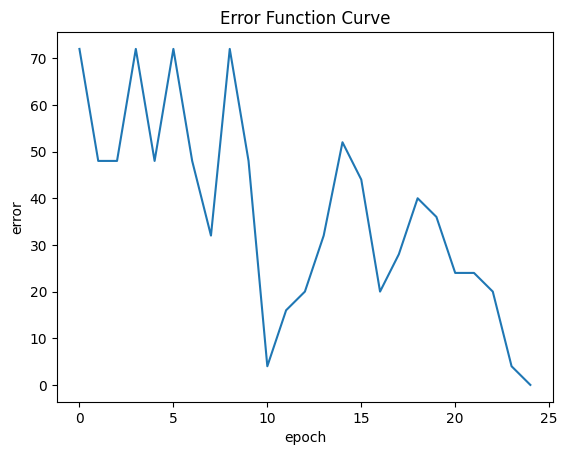

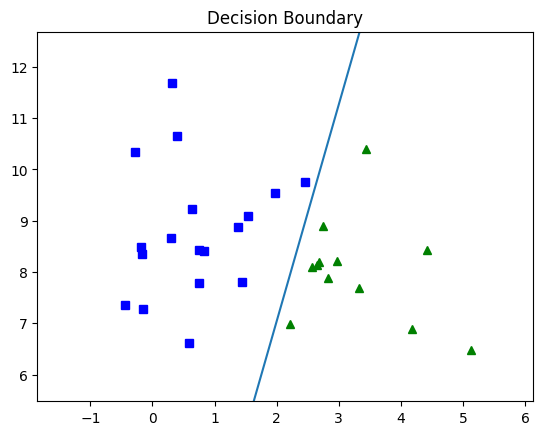

In [28]:
# Batch Training
perceptron = Perceptron(X_train, Y_train, epochs=100,lr=0.01)
w, in_err, converge_iter = perceptron.batch_fit()

# Error function curve
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.title('Error Function Curve')
plt.show()

# Decision boundary
y = Y_train.reshape(len(Y_train),)
plt.plot(X_train[:, 0][y == -1], X_train[:, 1][y == -1], 'g^')
plt.plot(X_train[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
xx = np.linspace(-1,11)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])
plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.title('Decision Boundary')
plt.show()

### Test the model and Calculate the accuracy

In [29]:
y_pred1 = []
X_test1 = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test1)):
    y_pred1.append(perceptron.predict(X_test1[i]))
acc1 = accuracy_score(Y_test, y_pred1)
print('Accuracy: '+ str(acc1))

Accuracy: 0.9


### Sequential training: Error function curve and Decision boundary¶

In [ ]:
# Sequential Training
perceptron_seq = Perceptron(X_train, Y_train, epochs=100,lr=0.01)
w_seq, wl_seq, in_err_seq, converge_iter_seq = perceptron_seq.seq_fit()

# Error function curve
plt.plot(in_err_seq)
plt.ylabel('error')
plt.xlabel('epoch')
plt.title('Error Function Curve')
plt.show()

# Decision boundary
y = Y_train.reshape(len(Y_train),)
plt.plot(X_train[:, 0][y == -1], X_train[:, 1][y == -1], 'g^')
plt.plot(X_train[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
xx = np.linspace(-1,11)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])
plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.title('Decision Boundary')
plt.show()

### Plot Sequential Training Weights

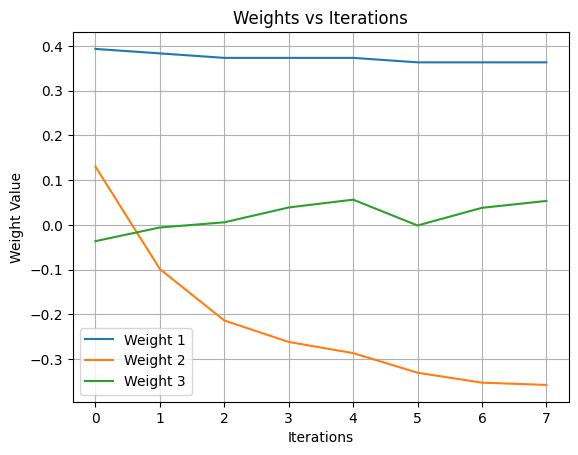

In [31]:
w1 = np.array([item[0][0] for item in wl_seq])
w2 = np.array([item[1][0] for item in wl_seq])
w3 = np.array([item[2][0] for item in wl_seq])
plt.plot(w1, label='Weight 1')
plt.plot(w2, label='Weight 2')
plt.plot(w3, label='Weight 3')
plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.title('Weights vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Test the model and Calculate the accuracy

In [33]:
y_pred2 = []
X_test2 = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test2)):
    y_pred2.append(perceptron.predict(X_test2[i]))
acc2 = accuracy_score(Y_test, y_pred2)
print('Accuracy: '+ str(acc2))

Accuracy: 0.9
